# **Salary Prediction**

## Introduction

### Objective of the project
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic information. To achieve this, several classification techniques are explored and the random forest model  and Random Forest And Radial Support Vector Machine yields to the best prediction result.


### The importance of census statistics 

The census is a special, wide-range activity. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process.

### Import Required Packages
Its very importnat to import all required packages.## Fetching Data 

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
import warnings                       
warnings.filterwarnings("ignore")

In [3]:
sns.set_style("ticks")

In [69]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [72]:
income_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names =  ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
income_df = pd.read_csv(income_data, na_values=[" ?"],
                         header=None, 
                         names = names)
income_df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country predclass  
0          2174             0              40   United-States     <=50K  
1             0             0              13   United-States     <=50K  
2             0             0              40   United-States     <=50K  
3             0             0              40   United-States     <=50K  
4             0             0              40            Cuba     <=50K

In [73]:
income_df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

### Data Dictionary

### ** 1. Categorical Attributes **
 * **workclass**: categorical
 * **education**: categorical
 * **marital-status**: categorical
 * **occupation**: categorical
 * **relationship**: categorical   
 * **race**: categorical
 * **sex**: categorical
 * **native-country**: categorical

### ** 2. Continuous Attributes* **
 * **age**: continuous
 * **education-num**: continuous
 * **fnlwgt**: continuous
 * **capital-gain**: continuous
 * **capital-loss**: continuous
 * **hours-per-week**: continuous 

## Data Cleaning

 ### Dealing with Missing Value

In [74]:
income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
predclass            0
dtype: int64

We can see that Attributes workclass, occupation, and native-country have most NAs. In next code block we are going to drop these NAs.

In [75]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [76]:
my_df = income_df.dropna()

In [77]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  object 
 2   fnlwgt          30162 non-null  int64  
 3   education       30162 non-null  object 
 4   education-num   30162 non-null  int64  
 5   marital-status  30162 non-null  object 
 6   occupation      30162 non-null  object 
 7   relationship    30162 non-null  object 
 8   race            30162 non-null  object 
 9   sex             30162 non-null  object 
 10  capital-gain    30162 non-null  int64  
 11  capital-loss    30162 non-null  int64  
 12  hours-per-week  30162 non-null  float64
 13  native-country  30162 non-null  object 
 14  predclass       30162 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [78]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
dtype: int64

As we can see now that there are no NAs in any of these attribues in our Data Frame. However, deleting missing values can have some drawbacks, such as losing valuable information and reducing the sample size of your dataset, which can affect the validity of your analysis. Additionally, it can introduce bias or distortion in your data, particularly if the missing values are not random or independent, but related to some underlying factors or patterns. But its very important to clean data set. Decision to drop missing values depends on situation & data set at hand.

## Feature Engineering

Feature Engineering is about applying domain knowledge to extract analytical representations from raw data and preparing them for machine learning. This is the first step in developing a predictive machine learning model. It helps increase the model's accuracy on new, unseen data.

In next code block we are going to find out unique attribue for each attribute to get ourselves familiar with Data Base.

In [79]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['marital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('sex',my_df.sex.unique())
print('native-country',my_df['native-country'].unique())
print('predclass',my_df.predclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 '

### Predclass

<Axes: xlabel='count', ylabel='predclass'>

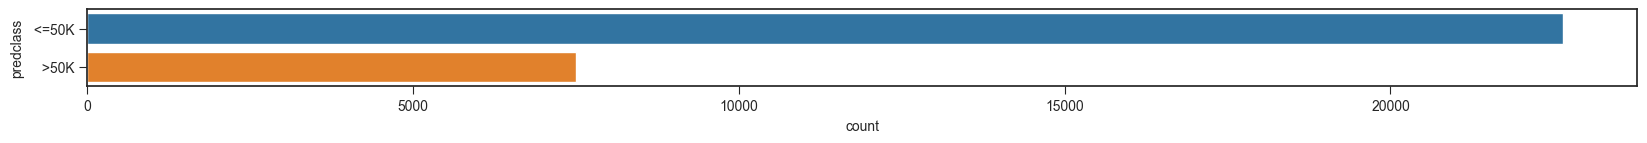

In [80]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df, order=my_df['predclass'].value_counts().index)

Income level less than 50K is more than 3 times of those above 50K. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group. Based on this analysis more people are making less than 50k. This can change if we study differnt database and timezone.

### Education Analysis

In a previous code block we know that we have following attributes for eductaion : Bachelors, HS-grad, 11th, Masters, 9th, Some-college,
Assoc-acdm, 7th-8th, Doctorate, Assoc-voc, Prof-school, 5th-6th, 10th, Preschool, 12th, 1st-4th. There is a number assigned to each eductaion category.

In [81]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

education  education-num
10      Doctorate           16.0
14    Prof-school           15.0
12        Masters           14.0
9       Bachelors           13.0
7      Assoc-acdm           12.0
8       Assoc-voc           11.0
15   Some-college           10.0
11        HS-grad            9.0
2            12th            8.0
1            11th            7.0
0            10th            6.0
6             9th            5.0
5         7th-8th            4.0
4         5th-6th            3.0
3         1st-4th            2.0
13      Preschool            1.0

In [82]:
my_df['education'].replace(' Preschool', 'dropout',inplace=True)
my_df['education'].replace(' 10th', 'dropout',inplace=True)
my_df['education'].replace(' 11th', 'dropout',inplace=True)
my_df['education'].replace(' 12th', 'dropout',inplace=True)
my_df['education'].replace(' 1st-4th', 'dropout',inplace=True)
my_df['education'].replace(' 5th-6th', 'dropout',inplace=True)
my_df['education'].replace(' 7th-8th', 'dropout',inplace=True)
my_df['education'].replace(' 9th', 'dropout',inplace=True)
my_df['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace(' HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace(' Masters', 'Masters',inplace=True)
my_df['education'].replace(' Prof-school', 'Masters',inplace=True)
my_df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

In [83]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

education  education-num
2         Doctorate      16.000000
4           Masters      14.249885
0         Bachelors      13.000000
1  CommunityCollege      10.369510
3          HighGrad       9.000000
5           dropout       5.609730

In [84]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df, order=my_df['education'].value_counts().index)

<Axes: xlabel='count', ylabel='education'>

### Marital-status Analysis

Diffrent Categories under this attribute are :Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated,  Married-AF-spouse,  Widowed

In [85]:
my_df['marital-status'].replace([' Never-married'], 'NotMarried',inplace=True)
my_df['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace([' Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)

<Axes: xlabel='count', ylabel='marital-status'>

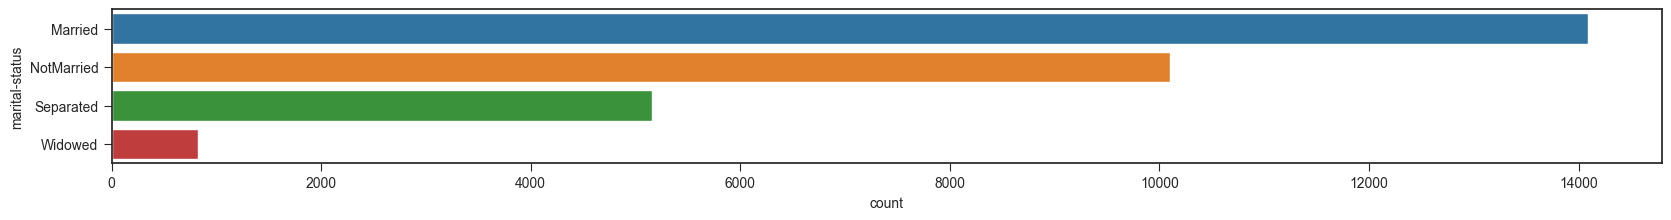

In [86]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df, order=my_df['marital-status'].value_counts().index)

### Occupation Analysis

<Axes: xlabel='count', ylabel='occupation'>

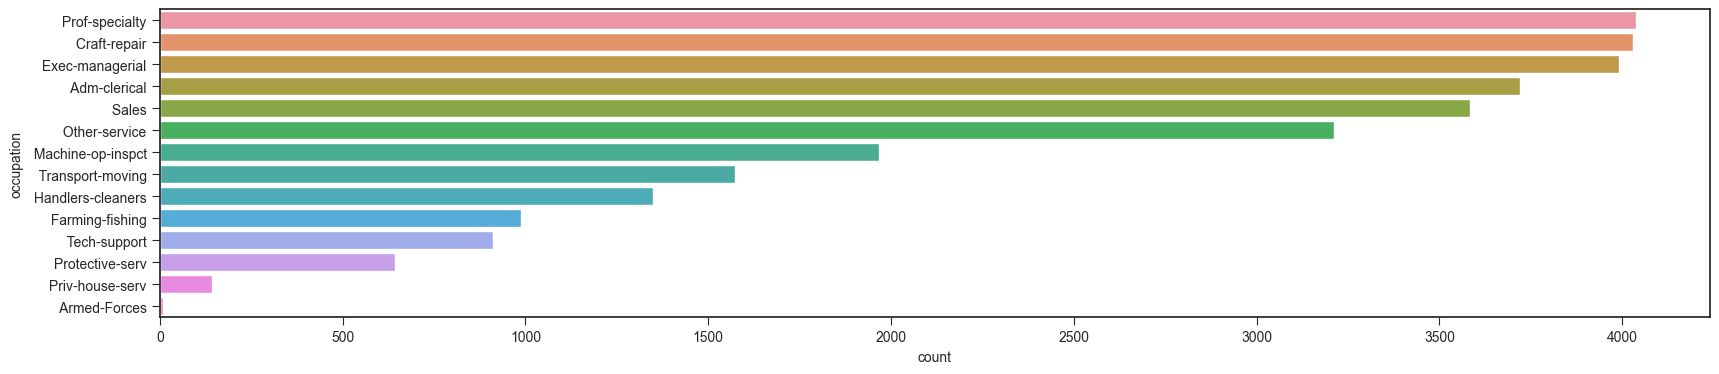

In [87]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df, order=my_df['occupation'].value_counts().index)

### Workclass Analysis

In [88]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df, order=my_df['workclass'].value_counts().index)

<Axes: xlabel='count', ylabel='workclass'>

### Age Analysis

In [89]:
my_df['age_bin'] = pd.cut(my_df['age'], 20)

In [90]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

predclass       age
1      >50K  43.95911
0     <=50K  36.60806

### Nationality

<Axes: xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

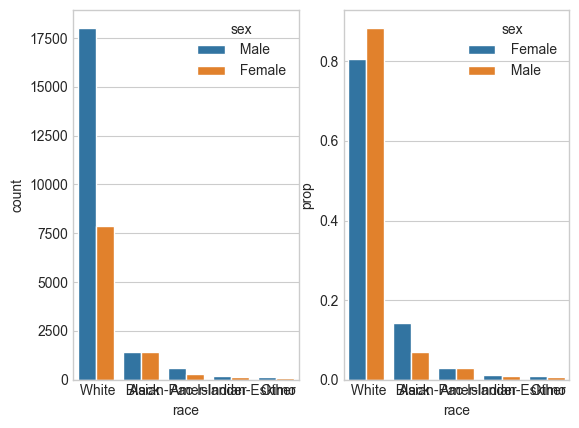

In [91]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])


### Hours of Work 

In [92]:
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

### Create a crossing feature: Age and hour of work

In [119]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              height=10)
sns.regplot(x = my_df.age, y = my_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

<Axes: xlabel='age', ylabel='hours-per-week'>

In [96]:
# Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

<Figure size 2000x500 with 0 Axes>

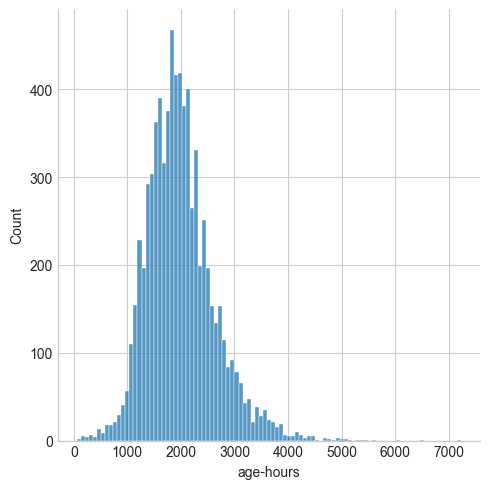

In [97]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.displot(my_df[my_df['predclass'] == ' >50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.displot(my_df[my_df['predclass'] == ' <=50K']['age-hours'], kde_kws={"label": "<$50K"})

## EDA

In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

### Pair Plot of Entire Dataset

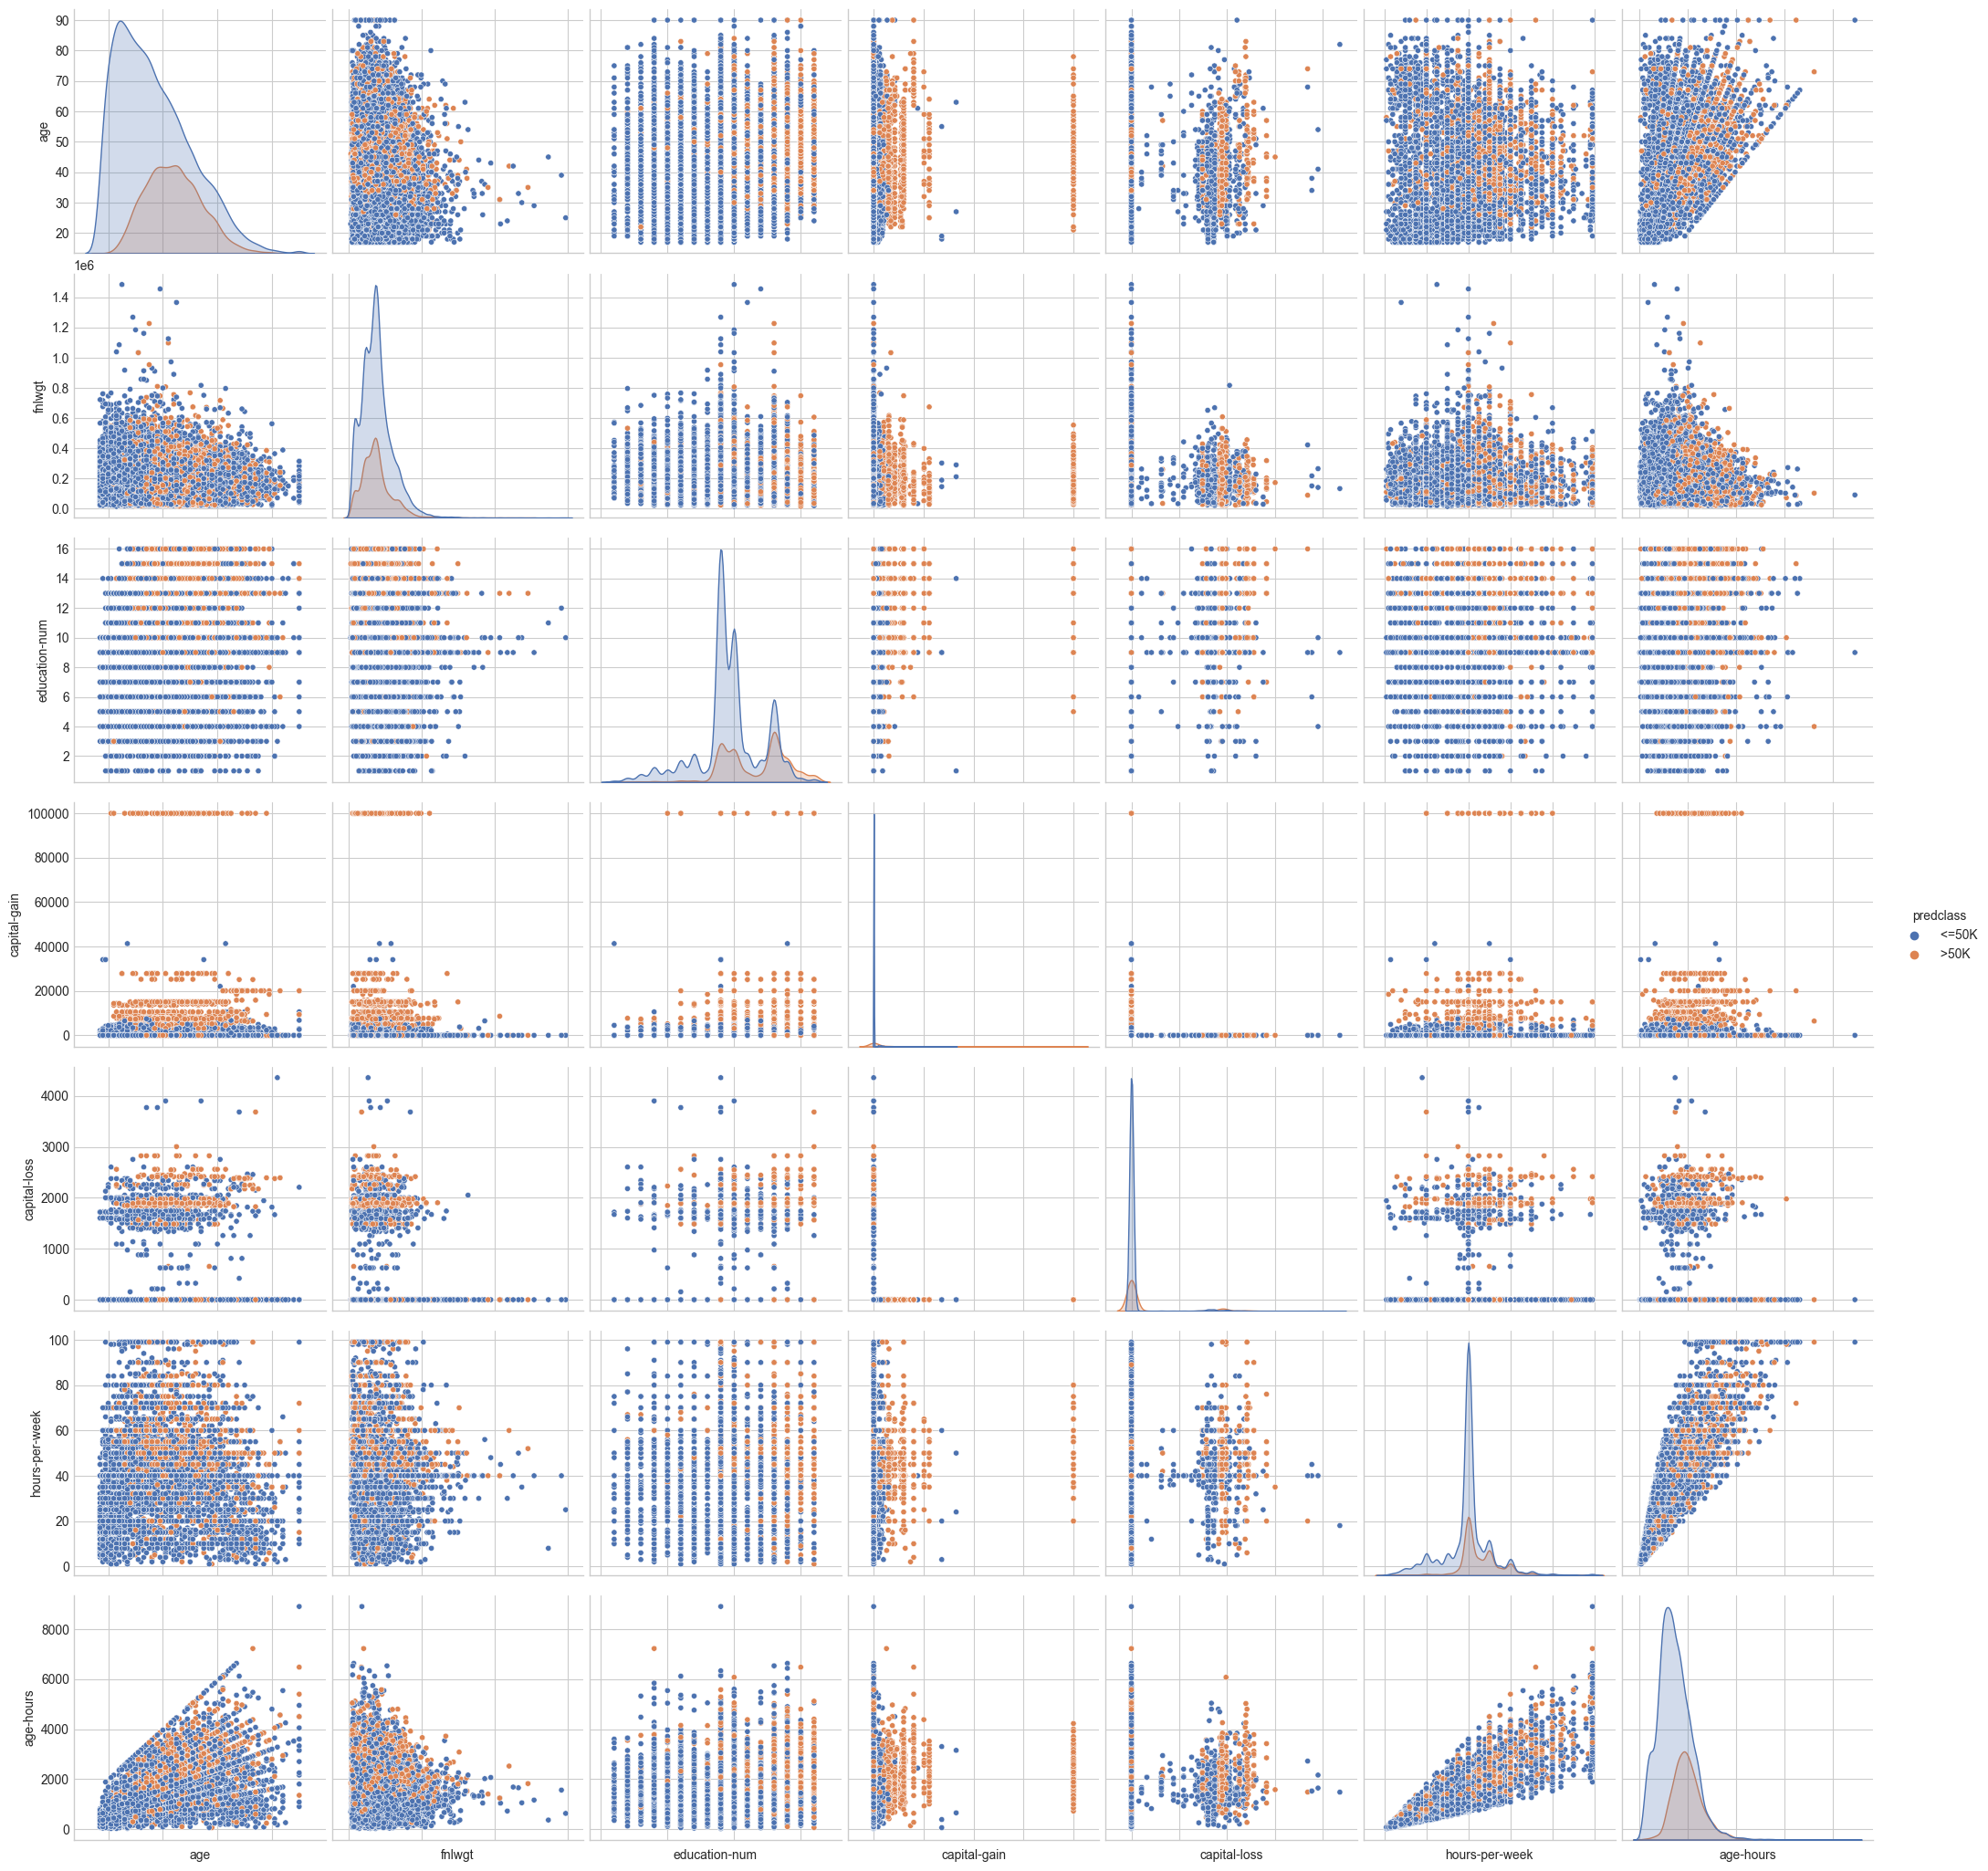

In [98]:
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  height=3, diag_kind = 'kde', diag_kws=dict(fill=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Correlation Heatmap

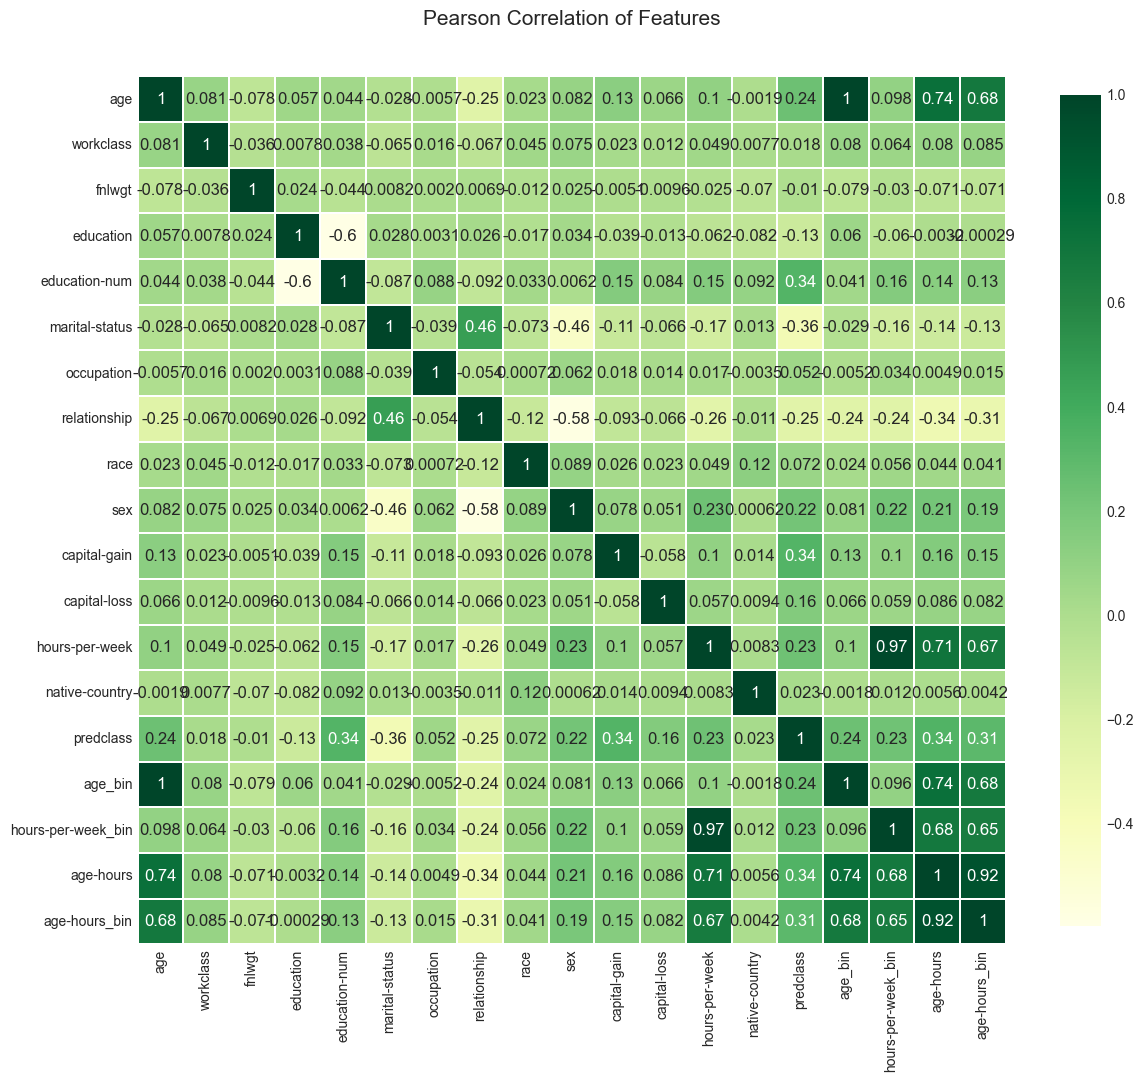

In [127]:
def correlation_heatmap(my_df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        my_df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)

### Age vs. Income Level

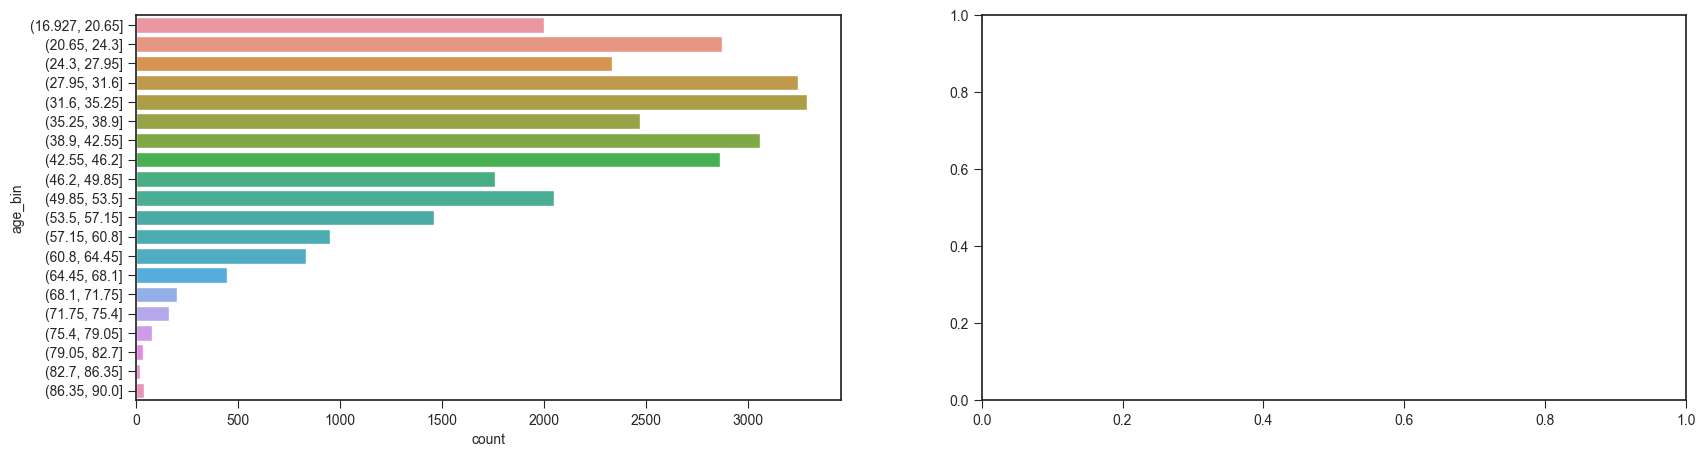

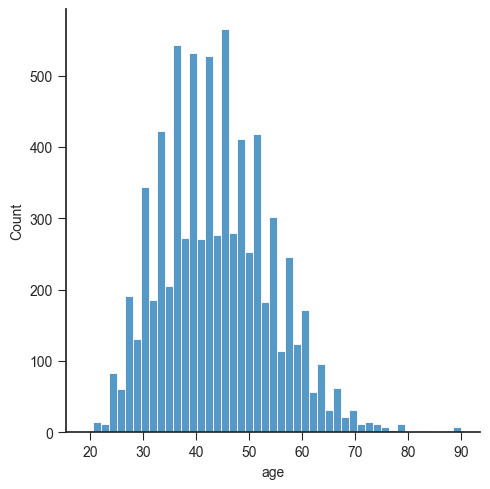

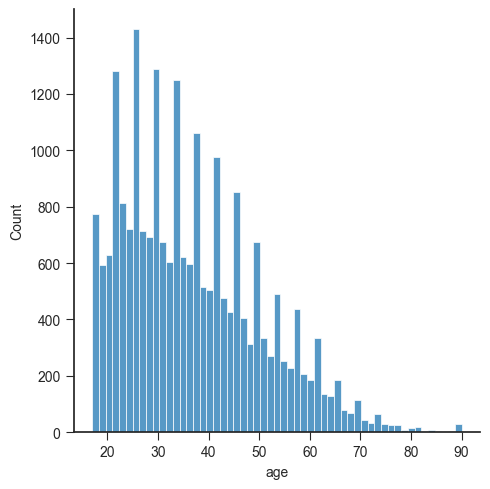

In [100]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.displot(my_df[my_df['predclass'] == ' >50K']['age'], kde_kws={"label": ">$50K"})
sns.displot(my_df[my_df['predclass'] == ' <=50K']['age'], kde_kws={"label": "<=$50K"})

### Working hour vs. Income Level

(20.0, 60.0)

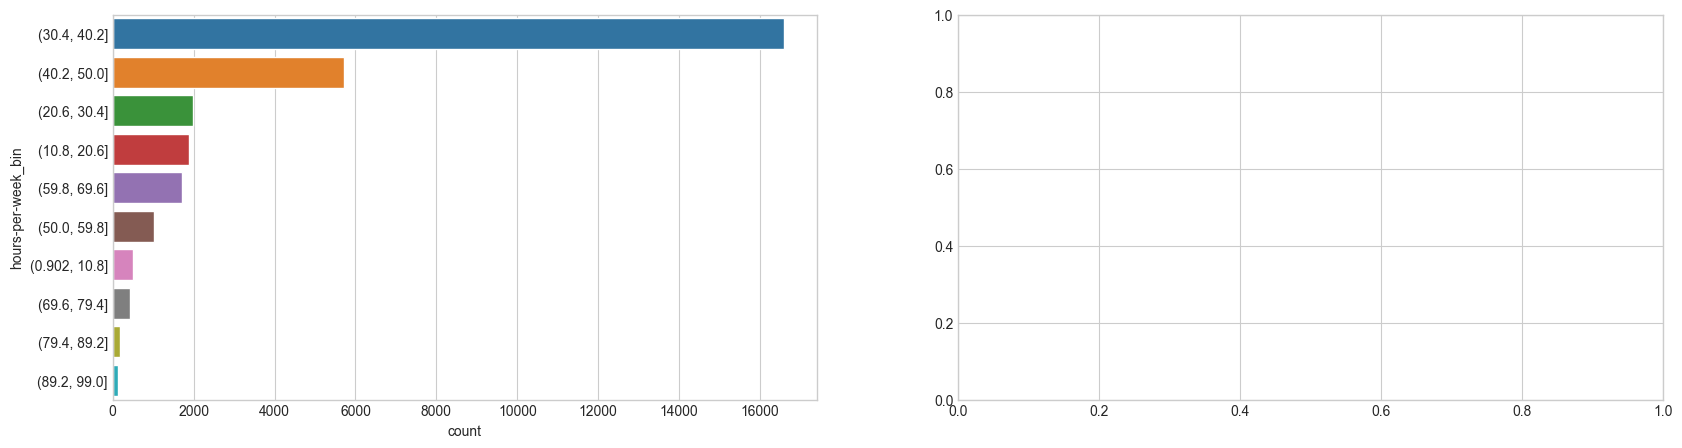

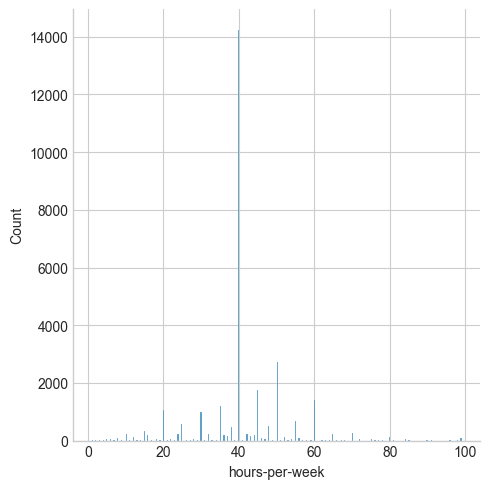

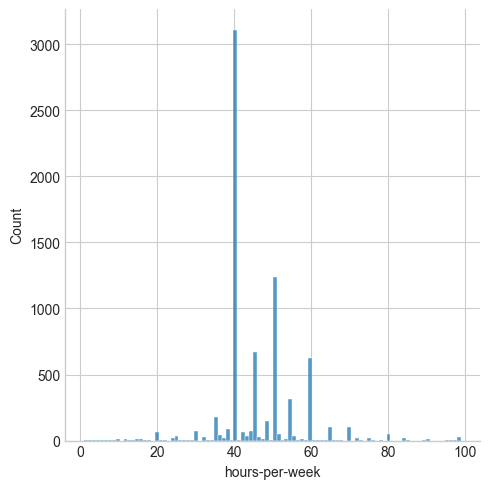

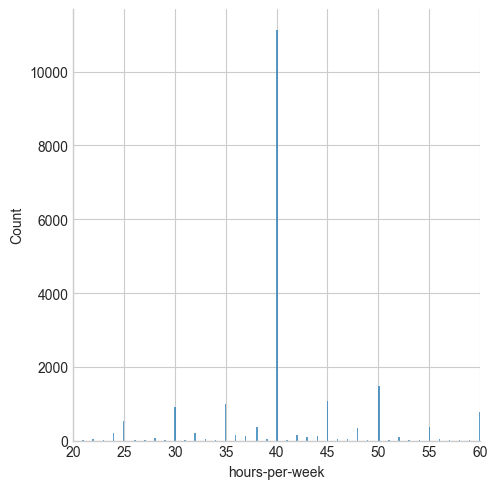

In [101]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df, order=my_df['hours-per-week_bin'].value_counts().index);
plt.subplot(1, 2, 2)
sns.displot(my_df['hours-per-week']);
sns.displot(my_df[my_df['predclass'] == ' >50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.displot(my_df[my_df['predclass'] == ' <=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)


### Occupation vs. Income Level

<Axes: xlabel='occupation', ylabel='age'>

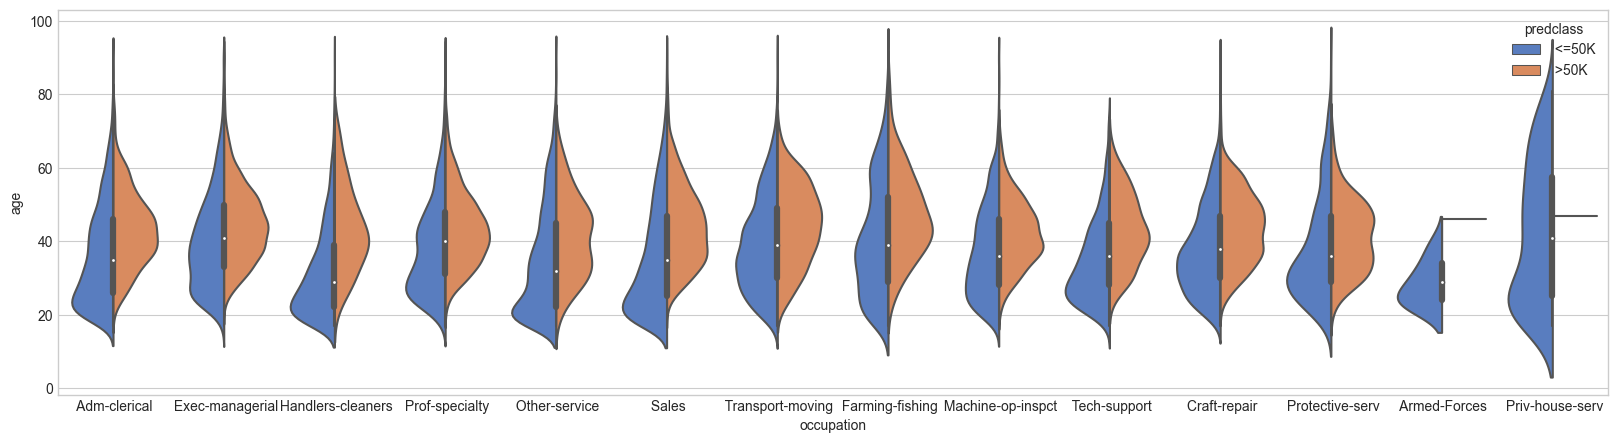

In [102]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

More senior workers have higher salaries. Armed-forces don't have a high job salaries. Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs. 

This result is from Kaggle's dataset. Due to the difference in extraction technique from Census database, the visualization results are different. People who work on private house service or who join the army now have income level about $50K. 

### Bivariate Analysis

In [103]:
my_df.tail()

age      workclass  fnlwgt         education  education-num  \
32556  27.0        Private  257302  CommunityCollege             12   
32557  40.0        Private  154374          HighGrad              9   
32558  58.0        Private  151910          HighGrad              9   
32559  22.0        Private  201490          HighGrad              9   
32560  52.0   Self-emp-inc  287927          HighGrad              9   

      marital-status          occupation relationship    race      sex  \
32556        Married        Tech-support         Wife   White   Female   
32557        Married   Machine-op-inspct      Husband   White     Male   
32558        Widowed        Adm-clerical    Unmarried   White   Female   
32559     NotMarried        Adm-clerical    Own-child   White     Male   
32560        Married     Exec-managerial         Wife   White   Female   

       capital-gain  capital-loss  hours-per-week  native-country predclass  \
32556             0             0            38.0   United-States     <=50K   
32557             0             0            40.0   United-States      >50K   
32558             0             0            40.0   United-States     <=50K   
32559             0             0            20.0   United-States     <=50K   
32560         15024             0            40.0   United-States      >50K   

             age_bin hours-per-week_bin  age-hours     age-hours_bin  
32556  (24.3, 27.95]       (30.4, 40.2]     1026.0   (909.9, 1798.8]  
32557  (38.9, 42.55]       (30.4, 40.2]     1600.0   (909.9, 1798.8]  
32558  (57.15, 60.8]       (30.4, 40.2]     2320.0  (1798.8, 2687.7]  
32559  (20.65, 24.3]       (10.8, 20.6]      440.0   (12.111, 909.9]  
32560  (49.85, 53.5]       (30.4, 40.2]     2080.0  (1798.8, 2687.7]

In [125]:
import math
import numpy.testing as testing

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


<Figure size 2000x1500 with 0 Axes>

### Race vs. Income Level

<Axes: xlabel='race', ylabel='age'>

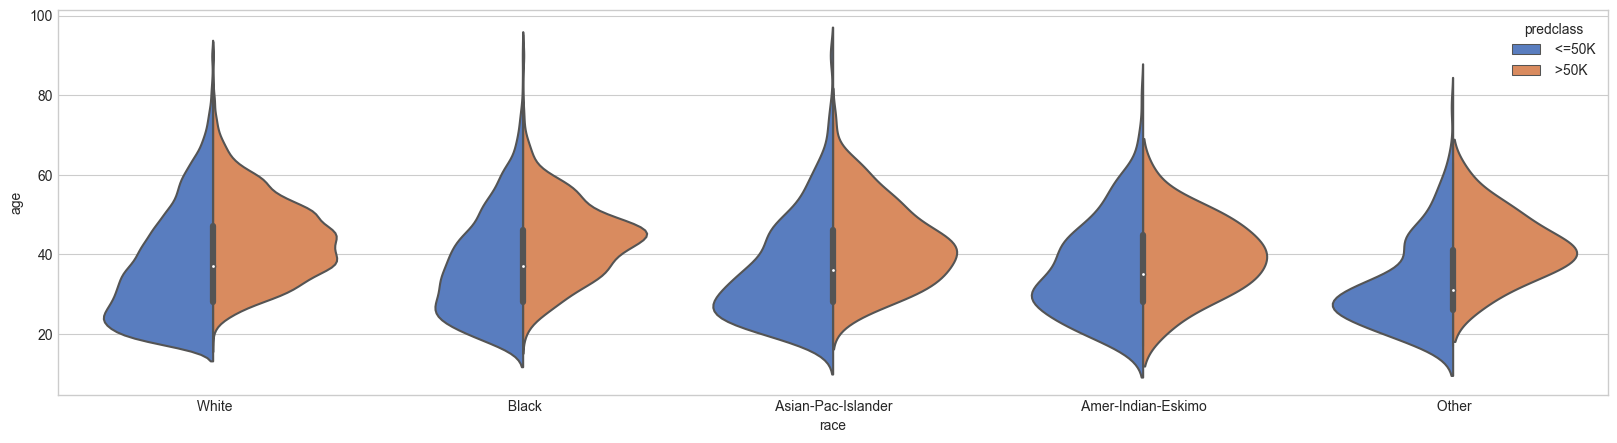

In [105]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

For income level above $50k, the mean for each race is almost the same at age of 40. 

## Building Machine Learning Models

In [106]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

### Feature Encoding 

In [107]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [108]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   22          5    2491          0             12               1   
1   33          4    2727          0             12               0   
2   21          2   13188          3              8               2   
3   36          2   14354          5              6               0   
4   11          2   18120          0             12               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1            24             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  predclass  age_bin  hours-per-week_bin  \
0              39              38          0        6                   3   
1              12              38          0        9                   1   
2              39              38          0        5                   3   
3              39              38          0        9                   3   
4              39               4          0        3                   3   

   age-hours  age-hours_bin  
0        589              1  
1        257              0  
2        578              1  
3        766              2  
4        437              1

### Train-test split

In [109]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)


In [110]:
drop_elements

['education',
 'native-country',
 'predclass',
 'age_bin',
 'age-hours_bin',
 'hours-per-week_bin']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Principal Component Analysis (PCA)

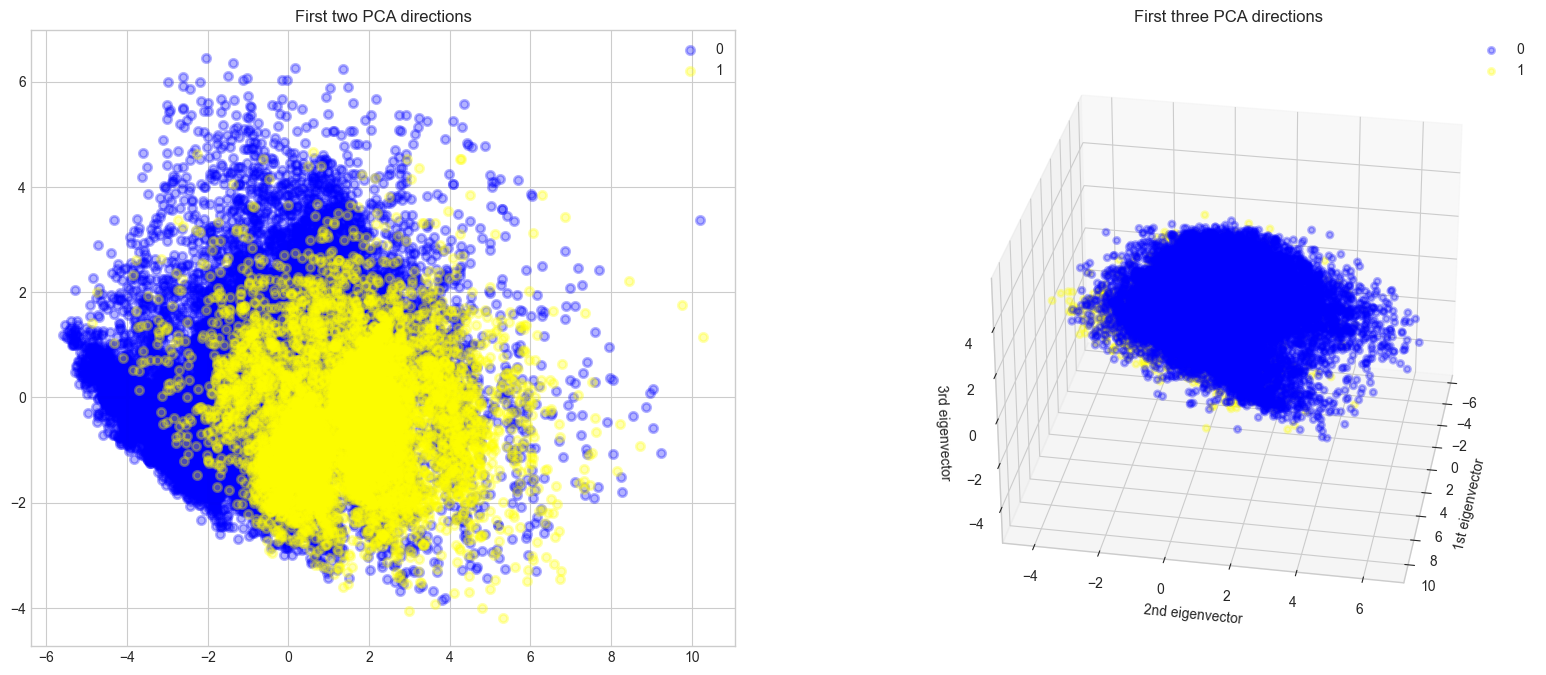

In [111]:
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('predclass', axis=1))
X = std_scale.transform(my_df.drop('predclass', axis=1))
y = my_df['predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3

# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [112]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.21306431, 0.33125071, 0.4180646 , 0.4992456 , 0.57921107,
       0.65429665, 0.72767437, 0.79970128, 0.86881165, 0.92652272,
       0.96866435, 0.99829882, 1.        ])


As show in the above result, No significant reduction happens due to the nature of this dataset, so there is not much meaning in carrying out PCA.

### Classification Models

#### Perceptron Method

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.

In [57]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

eta0float, default=1 : Constant by which the updates are multiplied.

random_state : Used to shuffle the training data, when shuffle is set to True.

In [58]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7062821150339798

Cross_val_score for ppn method

It splits the data set into multiple subsets of training and testing data, trains the model on each training subset, performs predictions on the testing subset, and outputs the prediction accuracy score for each subset.

In [59]:
from sklearn.model_selection import cross_val_score

score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7958357185347961

#### Gaussian Naive Bayes

Gaussian Naive Bayes (GNB) is a classification technique used in machine learning based on a probabilistic approach and Gaussian distribution. Gaussian Naive Bayes assumes that each parameter, also called features or predictors, has an independent capacity of predicting the output variable.

In [60]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8130283441074092


#### Linear Support Vector Machine

Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

In [61]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.747886623570363


#### Radical Support Vector Machine

Radial kernel support vector machine is a good approch when the data is not linearly separable. The idea behind generating non linear decision boundaries is that we need to do some non linear transformations on the features Xi which transforms them to a higher dimention space.

In [62]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.747886623570363


#### Logistic Regression

Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry.

In [113]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8004309630366319


#### Random Forest

Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [64]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.850488977291563


#### K-Nearest Neighbors

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7508702138239681


### Cross Validation

In [124]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) 
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

CV Mean       Std
Naive Bayes          0.802997  0.005640
Linear Svm           0.835223  0.007551
Radial Svm           0.847955  0.007655
Logistic Regression  0.835754  0.007675
Decision Tree        0.806214  0.006417
KNN                  0.836682  0.005856
Random Forest        0.849977  0.005418


Random Forest And Radial Support Vector Machine are the most accurate models.

Reflection : 
* Education data was dropped as it was collinear with education number.
* Marital - Status Categories were clubbed into single related category.
* Interestingly chances of having salary greater than 50k is high.
* Most people are working 40 hours a week. But among those who work more than 40 hours a week, the proportion of people having >50k is high.
* Married people have more chances of having income >50k as compared to never married and divorced.
* Income is more for higher age group.
* Higher value of education number maximizes the chnace of income >50k.
* The highest chances of having income >50k are in : Prof-School, Doctorate, Masters, Beachelors & Assoc-Voc.

#### GridSearch

GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to search and find the optimal combination of hyperparameters for a given model. It systematically explores a predefined set of hyperparameter values, creating a “grid” of possible combinations.

In [ ]:
model = RandomForestClassifier()
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], 
              #The number of features to consider when looking for the best split
              'max_depth': [50,80,100,150], 
              'min_samples_split': [5,7,9,11],
             }
grid_obj = GridSearchCV(model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5)
grid_obj = grid_obj.fit(X_train,y_train)
model_params = grid_obj.best_params_
model_params

C:\Users\sarab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
77 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

{'max_depth': 100,
 'max_features': 'log2',
 'min_samples_split': 11,
 'n_estimators': 500}

Reflection : 
* Education data was dropped as it was collinear with education number.
* Marital - Status Categories were clubbed into single related category.
* Interestingly chances of having salary greater than 50k is high.
* Most people are working 40 hours a week. But among those who work more than 40 hours a week, the proportion of people having >50k is high.
* Married people have more chances of having income >50k as compared to never married and divorced.
* Income is more for higher age group.
* Higher value of education number maximizes the chnace of income >50k.
* The highest chances of having income >50k are in : Prof-School, Doctorate, Masters, Beachelors & Assoc-Voc.

Reflection : 
* Education data was dropped as it was collinear with education number.
* Marital - Status Categories were clubbed into single related category.
* Interestingly chances of having salary greater than 50k is high.
* Most people are working 40 hours a week. But among those who work more than 40 hours a week, the proportion of people having >50k is high.
* Married people have more chances of having income >50k as compared to never married and divorced.
* Income is more for higher age group.
* Higher value of education number maximizes the chnace of income >50k.
* The highest chances of having income >50k are in : Prof-School, Doctorate, Masters, Beachelors & Assoc-Voc.